In [6]:
#importo librerie
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from scipy.stats import ttest_ind
from scipy.stats import kstest
from scipy.stats import linregress
from scipy.interpolate import interp1d

#importo datasets
df=pd.read_csv('co2_world.txt')
dt=pd.read_csv('temp_glob')
df8=pd.read_csv('gas_serra.txt')
dt8=pd.read_csv('Dati_800kY.txt')

#variabili
variaz_CO2_8=df8['CO2']-df8['CO2'].mean()
variaz_temp_8=dt8['Temperature']-dt8['Temperature'].mean()
appoggio = df.groupby('Year')['Emission_CO2'].mean()  
emissioni_per_anno=appoggio.iloc[96:]-appoggio.iloc[list(range(96,145))].mean()
anni = list(range(1890, 2021))
x=dt['YEAR']
y=dt['TEMP']
x1=dt['YEAR'].iloc[list(range(0,40))]
y1=dt['TEMP'].iloc[list(range(0,40))]-dt['TEMP'].iloc[list(range(0,40))].mean()
x2=dt['YEAR'].iloc[list(range(39,60))]
y2=dt['TEMP'].iloc[list(range(39,60))]-dt['TEMP'].iloc[list(range(0,40))].mean()
x3=dt['YEAR'].iloc[list(range(59,118))]
y3=dt['TEMP'].iloc[list(range(59,118))]-dt['TEMP'].iloc[list(range(0,40))].mean()
y_err=0.25
cumulative_sum = np.cumsum(emissioni_per_anno)


PRIMO SET DI PLOT: TEMP/CO2 AUMENTA?

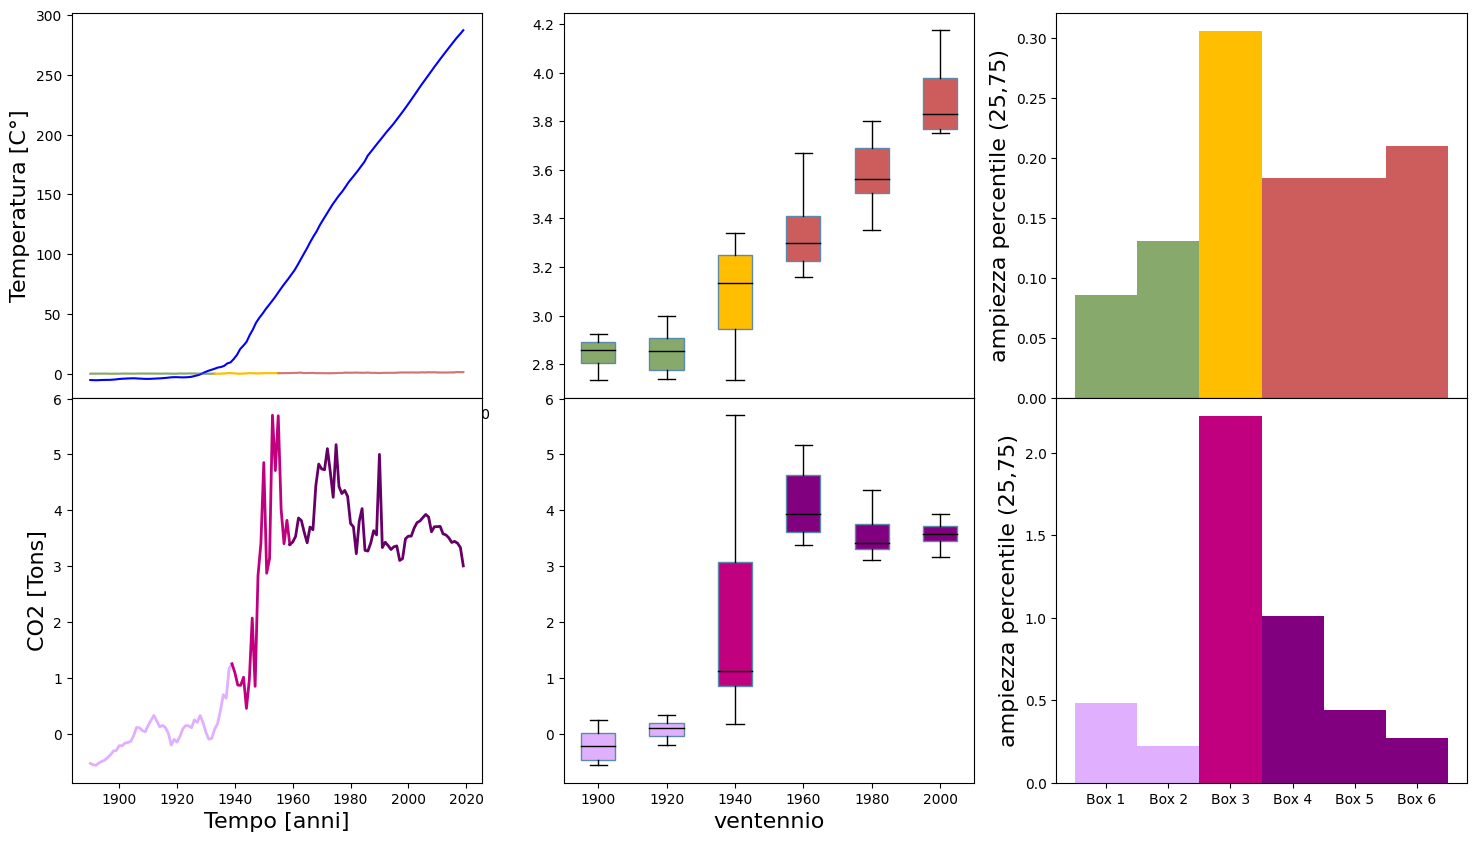

In [18]:
a=dt['TEMP']
c = [1,2,3,4,5,6]
subsets = [a[i:i+20] for i in range(0, len(a), 20)]
fig, ax = plt.subplots(ncols=3,nrows=2,figsize=(18,10))

ax[0,0].plot(x1,y1,color='#87A96B',label='variaz temperatura media')
#ax[0,0].plot(x,cumulative_sum[13:],color='blue',label='cumulativa della temperatura')
ax[0,0].errorbar(x1, y1, yerr=y_err, color='#87A96B',alpha=0.2)
ax[0,0].plot(x2,y2,color='#FFBF00',label='variaz temperatura media')
ax[0,0].errorbar(x2, y2, yerr=y_err, color='#FFBF00',alpha=0.3)
ax[0,0].plot(x3,y3,color='#CD5C5C',alpha=0.8,label='variaz temperatura media')
ax[0,0].errorbar(x3, y3, yerr=y_err, color='#CD5C5C',alpha=0.2)
#plt.plot(x,y.rolling(10, center=True, win_type='hamming').mean(), color='#4B0082', label='rolled data',lw=2)
ax[0,0].set_xlabel('Tempo [anni]',fontsize='16')
ax[0,0].set_ylabel('Temperatura [C°]',fontsize='16')

appoggio = df.groupby('Year')['Emission_CO2'].mean()  
emissioni_per_anno=appoggio.iloc[96:]-appoggio.iloc[list(range(96,145))].mean()
anni = list(range(1890, 2021))
ax[1,0].plot(list(range(1890, 1940)),emissioni_per_anno.iloc[list(range(0,50))],color='#E0B0FF',label='variaz CO2 media',lw=2)
ax[1,0].plot(list(range(1939, 1960)),emissioni_per_anno.iloc[list(range(49,70))],color='#C0007F',label='variaz temperatura media',lw=2)
ax[1,0].plot(list(range(1959, 2020)),emissioni_per_anno.iloc[list(range(69,130))],color='#660066',label='variaz temperatura media',lw=2)
#plt.plot(anni,emissioni_per_anno.rolling(20, center=True, win_type='hamming').mean(), color='#00A86B', label='rolled data',lw=1.5)
ax[1,0].set_xlabel('Tempo [anni]',fontsize='16')
ax[1,0].set_ylabel('CO2 [Tons]',fontsize='16')



fig.subplots_adjust(hspace=0)
box=ax[0,1].boxplot(subsets,whiskerprops=dict(color='black'), medianprops=dict(color='black'), patch_artist=True)
plt.setp(box['boxes'], color='#5D8AA8')
ax[0,1].set_xlabel('Tempo [anni]',fontsize='16')
#ax[0,1].set_ylabel('temperatura [°C]',fontsize='16')
etichette = ['1900', '1920', '1940','1960', '1980', '2000']
ax[0,1].set_xticks(c,etichette)

box_colors = ['#87A96B', '#87A96B','#FFBF00','#CD5C5C','#CD5C5C','#CD5C5C']
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)

percentiles = [np.percentile(d, [25, 50, 75]) for d in subsets]
percentile_lengths = [(p[2]-p[0]) for p in percentiles]
x_indexes = np.arange(len(percentile_lengths))
ax[0,2].set_ylabel('ampiezza percentile (25,75)',fontsize='16')
ax[0,2].bar(x_indexes, percentile_lengths, width=1, color=box_colors)
ax[0,2].set_xticks(x_indexes,etichette)
ax[0,2].set_xticklabels([f'Box {i+1}' for i in range(len(percentile_lengths))])



a1=emissioni_per_anno
c1 = [1,2,3,4,5,6]
subsets1 = [a1[i:i+22] for i in range(0, len(a), 22)]
box1=ax[1,1].boxplot(subsets1,whiskerprops=dict(color='black'), medianprops=dict(color='black'), patch_artist=True,showfliers=False)
plt.setp(box1['boxes'], color='#5D8AA8')
ax[1,1].set_xlabel('ventennio',fontsize='16')
#ax[1,1].set_ylabel('emissioni CO2 [Tons]',fontsize='16')
etichette1 = ['1900', '1920', '1940','1960', '1980', '2000']
ax[1,1].set_xticks(c1,etichette1)

box_colors1 = ['#E0B0FF','#E0B0FF','#C0007F','#800080','#800080','#800080']
for patch, color in zip(box1['boxes'], box_colors1):
    patch.set_facecolor(color)


percentiles1 = [np.percentile(d1, [25, 50, 75]) for d1 in subsets1]
percentile_lengths1 = [(p1[2]-p1[0]) for p1 in percentiles1]
x_indexes1 = np.arange(len(percentile_lengths1))
ax[1,2].set_ylabel('ampiezza percentile (25,75)',fontsize='16')
ax[1,2].bar(x_indexes1, percentile_lengths1, width=1, color=box_colors1)
ax[1,2].set_xticks(x_indexes1,etichette1)
ax[1,2].set_xticklabels([f'Box {i+1}' for i in range(len(percentile_lengths1))])

plt.savefig('boxplot.svg', format='svg')

Coefficiente angolare: 7.8381431824299925
Intercetta: 5.717411648310765
Chi quadro: 28060.890846688275
Correlazione incoricata: [-9.84096126e-07 -1.68008926e-06 -2.37489513e-06 ... -1.12852563e-06
 -7.99692032e-07 -4.24233823e-07]
Lo sfasamento tra le due serie è di 3996 unità di tempo.


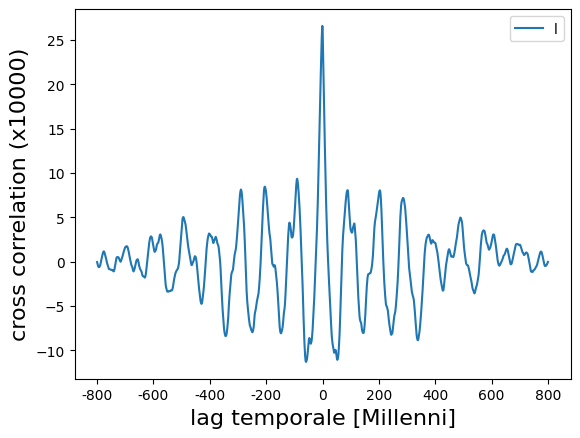

In [8]:
arr_sorted = np.sort(variaz_temp_8)
temp_interp = interp1d((dt8['Age'][1:])/1000, dt8['Temperature'][1:])(df8['Age'][1:])
variaz_temp_interp=temp_interp-dt8['Temperature'].mean()
# calcola i coefficienti della retta di regressione
m, b = np.polyfit(variaz_temp_interp,variaz_CO2_8[1:], 1)

# calcola il chi quadro del fit
y_fit = m * variaz_CO2_8[1:] + b
chi_sq = np.sum((variaz_temp_interp - y_fit)**2 / y_fit)

# calcola la correlazione dei dati

corr = np.correlate(variaz_CO2_8, variaz_temp_interp, mode='full')
corr_norm = (corr - np.mean(corr)) / (np.std(corr) * len(corr))

lag = np.argmax(corr) - len(x) + 1
# stampa i coefficienti, il chi quadro e la correlazione
print("Coefficiente angolare:", m)
print("Intercetta:", b)
print("Chi quadro:", chi_sq)
print("Correlazione incoricata:", corr_norm)

plt.plot(corr/10000)
plt.xlabel('lag temporale [Millenni]',fontsize='16')
plt.ylabel('cross correlation (x10000)',fontsize='16')
c1a=[0,1000,2000,3000,4000,5000,6000,7000,8000]
etichette1a = ['-800', '-600', '-400','-200','0','200', '400', '600','800']
plt.xticks(c1a,etichette1a)
plt.legend(labels='lag=800 Anni')
print("Lo sfasamento tra le due serie è di", np.argmax(corr), "unità di tempo.")
plt.savefig('corr_800000.svg', format='svg')

Chi quadrato = 6.8810
coeff_pearson:  0.8044704735038337


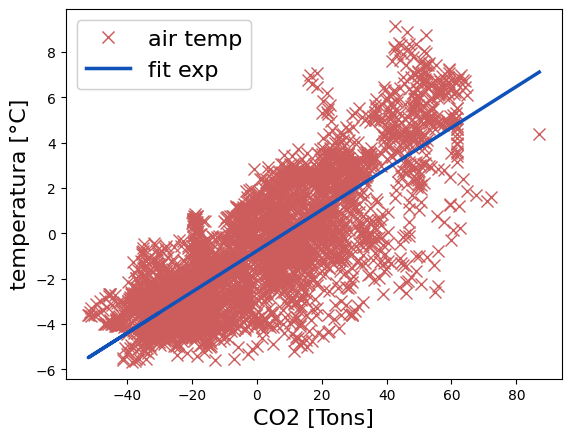

In [9]:
def linear_func(xn, an, bn):
    return an*xn + bn
popt, pcov = curve_fit(linear_func,variaz_CO2_8[:-22],variaz_temp_interp[21:])
plt.plot(variaz_CO2_8[:-22],variaz_temp_interp[21:],linestyle="", label='air temp', marker='x',color='#CD5C5C',markersize=8)
plt.plot(variaz_CO2_8[:-22],linear_func(variaz_CO2_8[:-22],*popt), label='fit exp',color='#0F52BA',lw=2.5)
#plt.yscale("log")
#plt.xlim(0,300)
plt.xlabel('CO2 [Tons]',fontsize='16')
plt.ylabel('temperatura [°C]',fontsize='16')
yfit = linear_func(variaz_temp_interp[21:], *popt)
residuals = variaz_temp_interp[21:] - yfit
chi_squared = np.sum(residuals**2) / (len(variaz_temp_interp[21:]) - 2)
print("Chi quadrato =",'{:.4f}'.format(chi_squared))
chi_square= stats.chisquare(variaz_temp_interp[21:])
corr = np.corrcoef(variaz_CO2_8[:-22],variaz_temp_interp[21:])[0, 1]
print('coeff_pearson: ',corr)
leg1 = plt.legend(fontsize='16')
plt.gca().add_artist(leg1) 
plt.savefig('reg_lin80000.svg', format='svg')

DETRENDING CUMULATIVA CROSS CORRELATION

/home/andrea/Scrivania/Labo_comp/venv/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


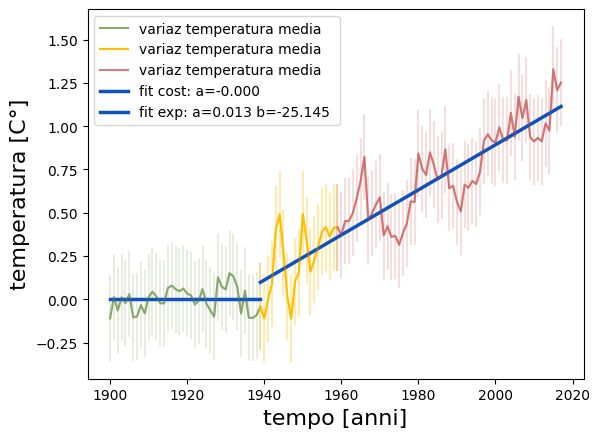

In [10]:
def const_func(x, a):
    return np.ones_like(x) * a
popt, pcov = curve_fit(const_func, x1, y1)
def linear_func(x, a, b):
    return a*x + b

y_err=0.25
plt.plot(x1,y1,color='#87A96B',label='variaz temperatura media')
plt.errorbar(x1, y1, yerr=y_err, color='#87A96B',alpha=0.2)
plt.plot(x2,y2,color='#FFBF00',label='variaz temperatura media')
plt.errorbar(x2, y2, yerr=y_err, color='#FFBF00',alpha=0.3)
plt.plot(x3,y3,color='#CD5C5C',alpha=0.8,label='variaz temperatura media')
plt.errorbar(x3, y3, yerr=y_err, color='#CD5C5C',alpha=0.2)
#plt.plot(x,y.rolling(10, center=True, win_type='hamming').mean(), color='#4B0082', label='rolled data',lw=2)
popt, pcov = curve_fit(const_func, x1, y1)
plt.plot(x1, const_func(x1, *popt), label='fit cost: a=%5.3f'  % tuple(popt),color='#0F52BA',lw=2.5)
popt, pcov = curve_fit(linear_func, x[39:],dt['TEMP'].iloc[list(range(39,118))]-dt['TEMP'].iloc[list(range(0,40))].mean())
plt.plot(x[39:], linear_func(x[39:],*popt), label='fit exp: a=%5.3f b=%5.3f ' % tuple(popt),color='#0F52BA',lw=2.5)
plt.xlabel('tempo [anni]',fontsize='16')
plt.ylabel('temperatura [C°]',fontsize='16')
plt.legend()

117


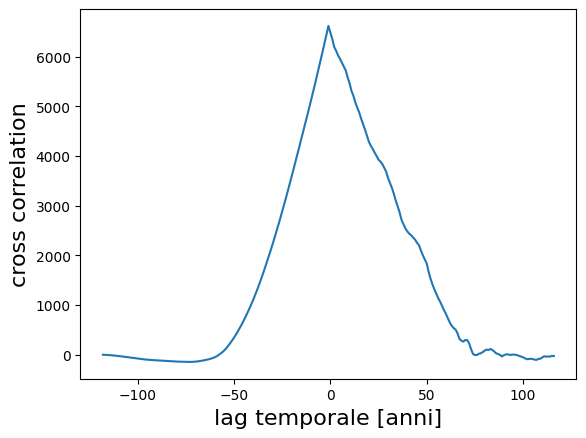

In [11]:
yv=y-dt['TEMP'].iloc[list(range(0,40))].mean()
corr2 = np.correlate(cumulative_sum[:-13],yv, mode='full')
plt.plot(list(range(-118,117)),corr2)
plt.xlabel('lag temporale [anni]',fontsize='16')
plt.ylabel('cross correlation',fontsize='16')
corr = np.corrcoef(cumulative_sum[13:],yv)[0, 1]
plt.savefig('corr1900.svg', format='svg')
print(np.argmax(corr2))



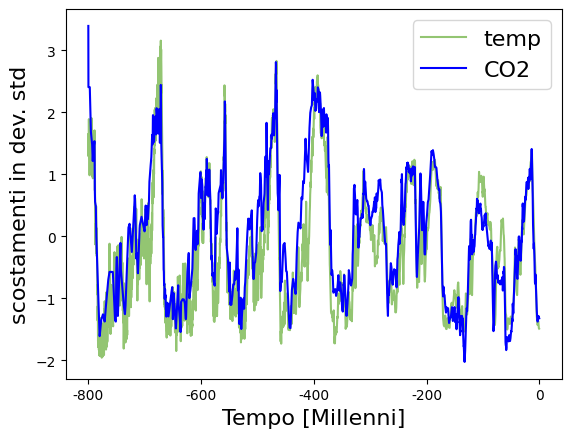

In [12]:
plt.plot( variaz_temp_interp/np.std(variaz_temp_interp),color='#93C572',label='temp')
plt.plot(variaz_CO2_8/np.std(variaz_CO2_8),color='#0000FF',label='CO2')
xtick_labels = ['-800', '-600', '-400', '-200', '0']
xtick_positions = [0,1000,2000,3000, 4000]
plt.xlabel('Tempo [Millenni]',fontsize='16')
plt.ylabel('scostamenti in dev. std',fontsize='16')
plt.xticks(xtick_positions, xtick_labels)
plt.legend(fontsize='16')
plt.savefig('variazdf.svg', format='svg')

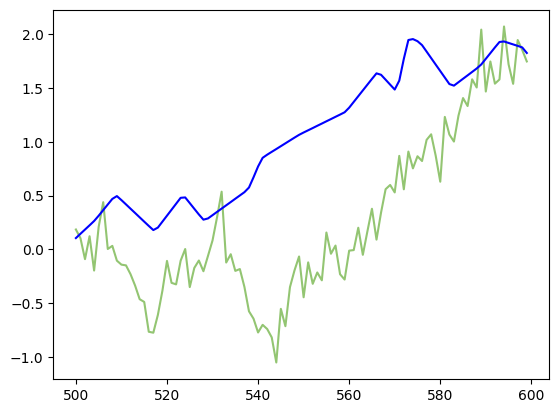

In [13]:
plt.plot(list(range(500,600)),variaz_temp_interp[500:600]/np.std(variaz_temp_interp),color='#93C572')
plt.plot(list(range(500,600)),variaz_CO2_8[500:600]/np.std(variaz_CO2_8),color='#0000FF')
plt.savefig('variazoom.svg', format='svg')

t-statistic = -0.7813872237302314
p-value = 0.43460121295977916
t-statistic = -12.655857198054937
p-value = 3.509751408909153e-30
t-statistic = -11.56838603314552
p-value = 4.798638421032535e-26


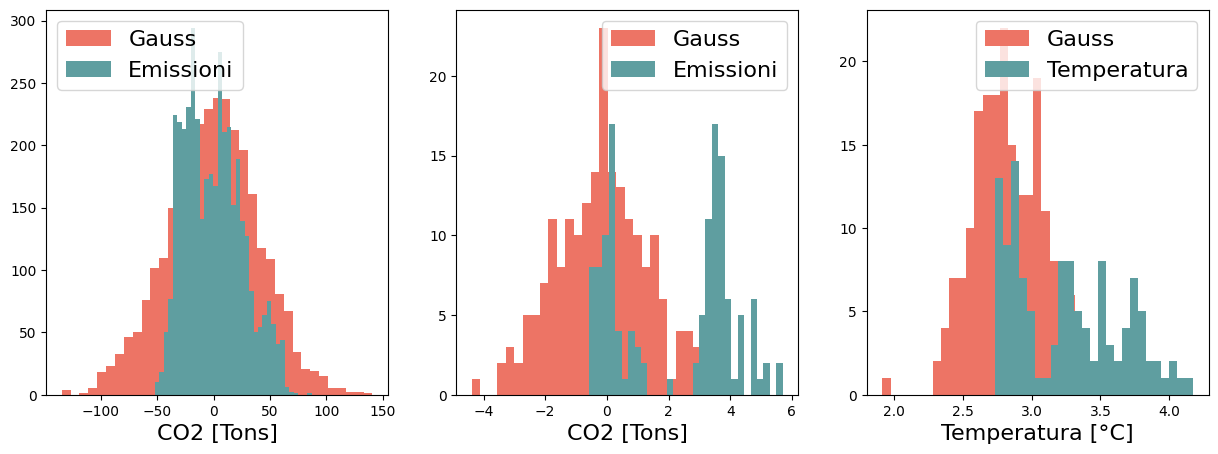

In [14]:
fig, fg = plt.subplots(ncols=3,figsize=(15,5))

gaussb=np.random.normal(variaz_CO2_8.mean(),40,3000)
fg[0].hist(gaussb,bins=35,color='#ED7465',label='Gauss')
fg[0].hist(variaz_CO2_8,bins=35,color='#5F9EA0',label='Emissioni')
fg[0].set_xlabel('CO2 [Tons]',fontsize='16')
t_stat, p_val = ttest_ind(gaussb, variaz_CO2_8)
print("t-statistic =", t_stat)
print("p-value =", p_val)
fg[0].legend(loc='upper left',fontsize='16')


gaussc=np.random.normal(emissioni_per_anno.head(40).mean(),1.5,200)
fg[1].hist(gaussc,bins=30,color='#ED7465',label='Gauss')
fg[1].hist(emissioni_per_anno,bins=30,color='#5F9EA0',label='Emissioni')
fg[1].set_xlabel('CO2 [Tons]',fontsize='16')
t_stat, p_val = ttest_ind(gaussc, emissioni_per_anno)
print("t-statistic =", t_stat)
print("p-value =", p_val)
fg[1].legend(fontsize='16')



gaussd=np.random.normal(y.head(40).mean(),0.25,200)
fg[2].hist(gaussd,bins=25,color='#ED7465',label='Gauss')
fg[2].hist(y,bins=25,color='#5F9EA0',label='Temperatura')
fg[2].set_xlabel('Temperatura [°C]',fontsize='16')
t_stat, p_val = ttest_ind(gaussd, y)
print("t-statistic =", t_stat)
print("p-value =", p_val)
fg[2].legend(fontsize='16')
plt.savefig('hist.svg',format='svg')

plt.show()